# Visualización de Datos

## 1. Objetivos:
- Explorar la distribución de los datos
- Obtener una imagen general de que tan organizada esta la información
- Identificar valores atípicos

In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis

In [59]:
df = pd.read_csv('../data/shop_customer_data_2022.csv',index_col=0)

In [60]:
df.rename(
    columns={"Annual Income ($)": "Annual Inconme", "Spending Score (1-100)": "Spending Score"},
    inplace=True
)

In [20]:
df.head()

,Gender,Age,Annual Inconme,Spending Score,Profession,Work Experience,Family Size
CustomerID,,,,,,,
1,Male,32,15000,39,Healthcare,1,4
2,Male,24,35000,81,Engineer,3,3
3,Female,28,86000,6,Engineer,1,1
4,Female,23,59000,77,Lawyer,0,2
5,Female,31,38000,40,Entertainment,2,6


### Boxplot (Caja y Bigotes)

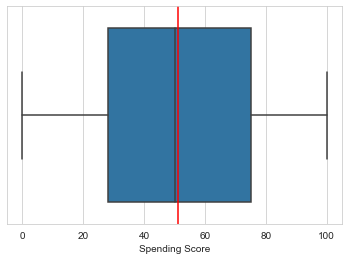

In [21]:
sns.set_style("whitegrid") 

sns.boxplot(x=df['Spending Score'])
#La mayoria de los datos estan concentrados entre los valores 30 y 75
#La linea vertical indica el percentil 50
#Aqui tenemos una distribución que tiende hacia los valores centrales y no hay datos dispersos
plt.axvline(df['Spending Score'].mean(), c='r')  #Promedio

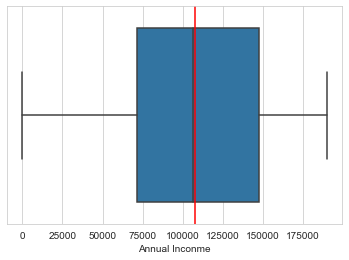

In [22]:
sns.set_style("whitegrid") 

sns.boxplot(x=df['Annual Inconme'])
#La mayoria de los datos estan concentrados entre los valores 75.000 y 150.000
#La linea vertical indica el percentil 50 - 110045.0
#Aqui tenemos una distribución que tiende sutilmente hacia la derecha 
plt.axvline(df['Annual Inconme'].mean(), c='r') #Promedio - 110731.82

### Tabla de Frecuencia
A continuación segmentare la variable Annual Income en 15 partes para evaluar la distribución de los datos

In [61]:
inconme = df['Annual Inconme']
segmentos = pd.cut(inconme, 15)

df['Annual Inconme'].groupby(segmentos).count()
#A pesar de que el dataframe no tiene valores negativos, 
#vemos la representación del primer segmento con un limite inicial negativo

#Podemos confirmar con esta tabla que no hay valores atipicos

Annual Inconme
(-189.974, 12664.933]        88
(12664.933, 25329.867]       29
(25329.867, 37994.8]         34
(37994.8, 50659.733]         49
(50659.733, 63324.667]      167
(63324.667, 75989.6]        191
(75989.6, 88654.533]        188
(88654.533, 101319.467]     186
(101319.467, 113984.4]      154
(113984.4, 126649.333]      158
(126649.333, 139314.267]    144
(139314.267, 151979.2]      173
(151979.2, 164644.133]      134
(164644.133, 177309.067]    155
(177309.067, 189974.0]      150
Name: Annual Inconme, dtype: int64

In [25]:
age = df['Age']
segmentos = pd.cut(age, 10)

df['Age'].groupby(segmentos).count()

Age
(11.917, 20.3]     44
(20.3, 28.6]      285
(28.6, 36.9]      347
(36.9, 45.2]      248
(45.2, 53.5]      180
(53.5, 61.8]      200
(61.8, 70.1]      332
(70.1, 78.4]      159
(78.4, 86.7]      168
(86.7, 95.0]       37
Name: Age, dtype: int64

In [45]:
score = df['Spending Score']
fsize = df['Family Size']

### Histograma

<AxesSubplot:xlabel='Age', ylabel='Count'>

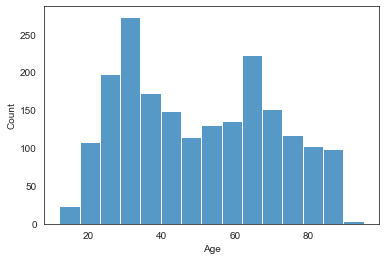

In [38]:
sns.set_style('white')
sns.histplot(age) 

In [37]:
print(f'Curtosis: {kurtosis(age)}') #No hay dispersión, colas cortas
print(f'Asimetría: {skew(age)}')  #Cola Derecha mas larga

Curtosis: -1.1865904428902931
Asimetría: 0.18170657575544558


<AxesSubplot:xlabel='Annual Inconme', ylabel='Count'>

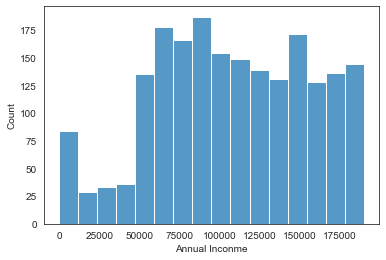

In [49]:
sns.histplot(inconme, kde=False)

In [40]:
print(f'Curtosis: {kurtosis(inconme)}') #No hay mucha dispersión, colas cortas
print(f'Asimetría: {skew(inconme)}') #Cola Izquierda mas larga

Curtosis: -0.7115659435465584
Asimetría: -0.20751404830570178


<AxesSubplot:xlabel='Annual Inconme', ylabel='Count'>

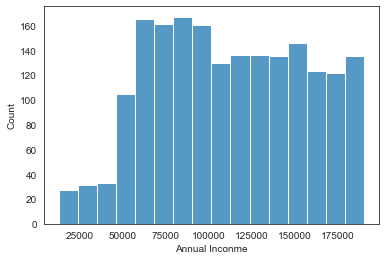

In [77]:
inconme2 = df[df['Annual Inconme'] > 12000]
inconme2 = inconme2['Annual Inconme']
sns.histplot(inconme2) 


In [79]:
#Que sucede al eliminar los registros con ingresos muy bajos
print(f'Curtosis: {kurtosis(inconme2)}') #Aumenta la curtosis negativa, menor dispersión
print(f'Asimetría: {skew(inconme2)}') # Mayor simetria

Curtosis: -1.0097867736225052
Asimetría: -0.0006652218199876752


<AxesSubplot:xlabel='Spending Score', ylabel='Count'>

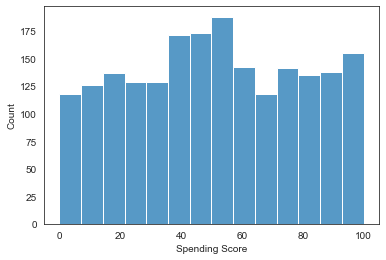

In [48]:
sns.histplot(score) 

In [47]:
print(f'Curtosis: {kurtosis(score)}') #Distribución uniforme
print(f'Asimetría: {skew(score)}') #Alto grado de simetría

Curtosis: -1.1009801550230232
Asimetría: 0.004551831047735134
